In [43]:
from viz.utils import *
%matplotlib inline

from main import run_app

In [5]:
train_dir='data/synthetic/train/'
test_dir='data/synthetic/test/'
configs={
    # Model configs
    'layer_sizes': [60, 10], 'act_funcs': ['softmax'],
    'dataset_name': 'synthetic',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 2000,
    'pct_client_per_round': 0.1,
    'num_epochs': 1,
    'batch_size': 10,
    'lr': 0.1,
    'q': 1
}

server, clients = run_app(train_dir, test_dir, configs)

100%|██████████| 2000/2000 [02:50<00:00, 11.74it/s]


In [9]:
df = get_results_from_server(server)

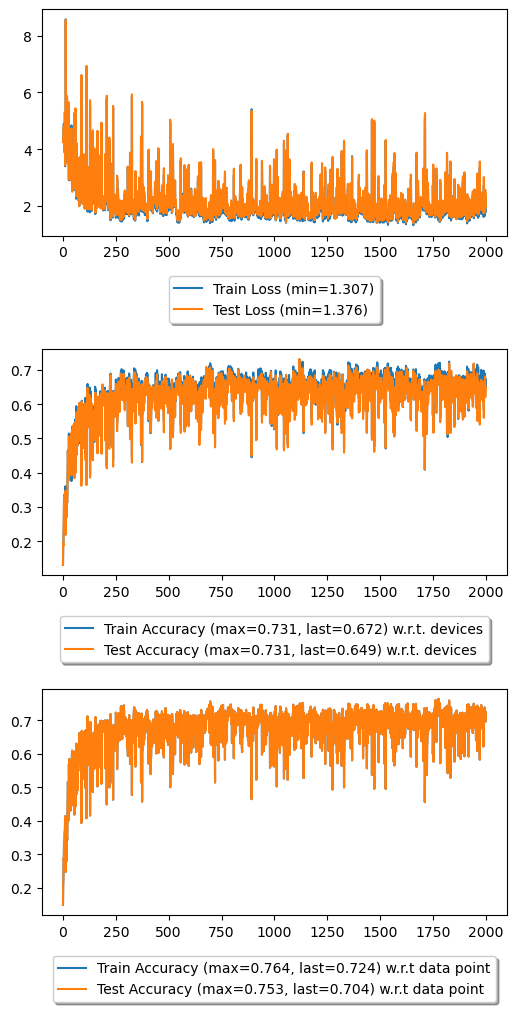

In [10]:
plot_by_round(df)

# Benchmark

In [4]:
from viz.utils import *
%matplotlib inline

from main import run_app

In [5]:
train_dir='data/synthetic/train/'
test_dir='data/synthetic/test/'
configs={
    # Model configs
    'layer_sizes': [60, 10], 'act_funcs': ['softmax'],
    'dataset_name': 'synthetic',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 2000,
    'pct_client_per_round': 0.1,
    'num_epochs': 1,
    'batch_size': 10,
    'lr': 0.1
}

# q=0

In [6]:
# q=0
configs['q'] = 0
server_q0, clients_q_0 = run_app(train_dir, test_dir, configs, report=False)

100%|██████████| 2000/2000 [03:10<00:00, 10.49it/s]


In [7]:
res_q0 = {
    'q': 0
}
q0_resdf = get_results_from_server(server_q0)
res_q0.update(fairness_result(q0_resdf))

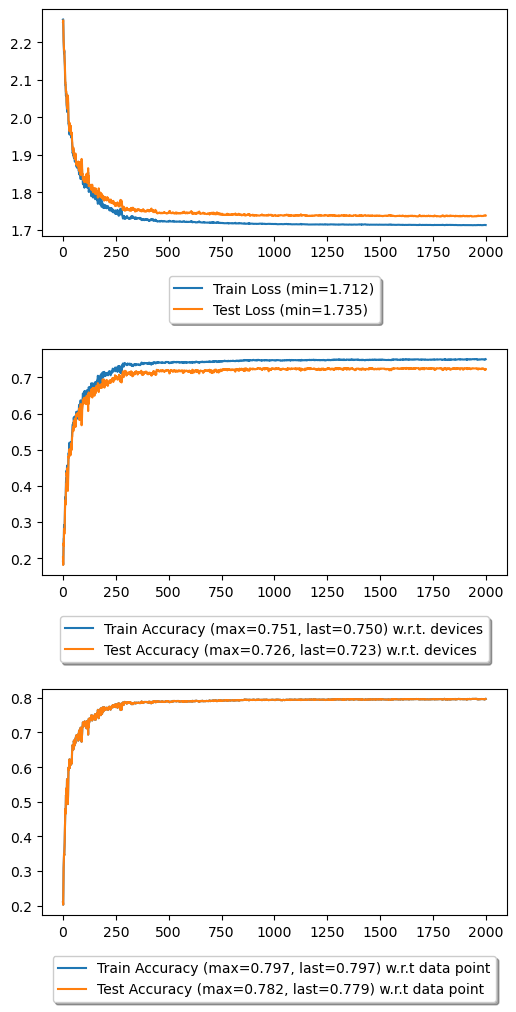

In [8]:
_ = plot_by_round(q0_resdf)

# q=1

In [9]:
# q=1
configs['q'] = 1
server_q1, clients_q1 = run_app(train_dir, test_dir, configs, report=False)

100%|██████████| 2000/2000 [03:10<00:00, 10.48it/s]


In [10]:
res_q1 = {
    'q': 1
}
q1_resdf = get_results_from_server(server_q1)
res_q1.update(fairness_result(q1_resdf))

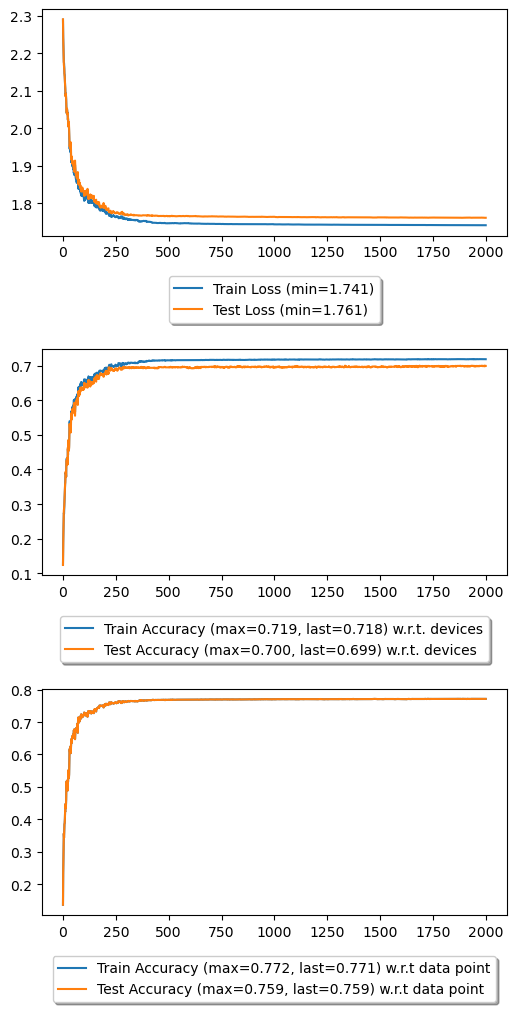

In [14]:
_ = plot_by_round(q1_resdf)

In [15]:
resdf = pd.DataFrame([res_q0, res_q1])

In [16]:
resdf

,q,subset,avg_acc,worst_10,best_10,variance
0,0,test,76.636836,0.0,100.0,1159.454750
1,1,test,74.690781,0.0,100.0,1376.551054
